In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
       (coordinate[0], coordinate[1])

In [5]:
from citipy import citipy

In [6]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

614

In [35]:
import requests

from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | tsumeb
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | viligili
City not found. Skipping...
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | joppatowne
Processing Record 18 of Set 1 | beinamar
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | saint-philippe
Processing 

Processing Record 36 of Set 4 | vestmannaeyjar
Processing Record 37 of Set 4 | itoman
Processing Record 38 of Set 4 | west helena
Processing Record 39 of Set 4 | buin
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | kavaje
Processing Record 43 of Set 4 | gizo
Processing Record 44 of Set 4 | sombrio
Processing Record 45 of Set 4 | jacareacanga
Processing Record 46 of Set 4 | theodoriana
Processing Record 47 of Set 4 | kuminskiy
Processing Record 48 of Set 4 | krutinka
Processing Record 49 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 50 of Set 4 | springdale
Processing Record 1 of Set 5 | dharmanagar
Processing Record 2 of Set 5 | eyl
Processing Record 3 of Set 5 | balabac
Processing Record 4 of Set 5 | diamantino
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | 

Processing Record 26 of Set 8 | tazovskiy
Processing Record 27 of Set 8 | kulhudhuffushi
Processing Record 28 of Set 8 | labuan
Processing Record 29 of Set 8 | bangassou
Processing Record 30 of Set 8 | ojinaga
Processing Record 31 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 32 of Set 8 | lensk
Processing Record 33 of Set 8 | komsomolskiy
Processing Record 34 of Set 8 | derzhavinsk
Processing Record 35 of Set 8 | hoganas
Processing Record 36 of Set 8 | manvi
Processing Record 37 of Set 8 | manavalakurichi
Processing Record 38 of Set 8 | pauini
Processing Record 39 of Set 8 | akyab
Processing Record 40 of Set 8 | de aar
Processing Record 41 of Set 8 | fredonia
Processing Record 42 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 8 | portobelo
Processing Record 44 of Set 8 | kon tum
Processing Record 45 of Set 8 | shingu
Processing Record 46 of Set 8 | rio esteban
Processing Record 47 of Set 8 | ayan
Processing Record 48 of Set 8 | erenhot
P

Processing Record 14 of Set 12 | la union
Processing Record 15 of Set 12 | raska
Processing Record 16 of Set 12 | chicama
Processing Record 17 of Set 12 | piedras negras
Processing Record 18 of Set 12 | maxixe
Processing Record 19 of Set 12 | hobyo
Processing Record 20 of Set 12 | encruzilhada
Processing Record 21 of Set 12 | madera
Processing Record 22 of Set 12 | sorong
Processing Record 23 of Set 12 | dakar
Processing Record 24 of Set 12 | sept-iles
Processing Record 25 of Set 12 | trairi
Processing Record 26 of Set 12 | alice town
Processing Record 27 of Set 12 | chabahar
Processing Record 28 of Set 12 | zhemchuzhnyy
City not found. Skipping...
Processing Record 29 of Set 12 | ugoofaaru
Processing Record 30 of Set 12 | manta
Processing Record 31 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 32 of Set 12 | andros town
Processing Record 33 of Set 12 | middelburg
Processing Record 34 of Set 12 | charlottesville
Processing Record 35 of Set 12 | akureyri
Pro

In [11]:
len(city_data)

561

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,63.55,99,90,1.01,EC,2022-09-14 05:08:15
1,Tsumeb,-19.2333,17.7167,65.93,16,0,10.18,NA,2022-09-14 05:08:15
2,Vaini,-21.2000,-175.2000,77.16,88,75,8.05,TO,2022-09-14 05:08:15
3,Saint-Francois,46.4154,3.9054,62.04,100,0,2.30,FR,2022-09-14 05:08:15
4,Pevek,69.7008,170.3133,34.21,99,100,6.02,RU,2022-09-14 05:08:16
5,Ponta Do Sol,32.6667,-17.1000,70.72,78,37,8.72,PT,2022-09-14 05:08:16
6,Mar Del Plata,-38.0023,-57.5575,47.08,94,100,5.01,AR,2022-09-14 05:08:17
7,Hithadhoo,-0.6000,73.0833,81.54,70,1,5.84,MV,2022-09-14 05:08:17
8,Ushuaia,-54.8000,-68.3000,38.86,70,0,3.44,AR,2022-09-14 05:06:25
9,Mahebourg,-20.4081,57.7000,76.24,67,90,6.35,MU,2022-09-14 05:08:17


In [13]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-09-14 05:08:15,-0.7393,-90.3518,63.55,99,90,1.01
1,Tsumeb,NA,2022-09-14 05:08:15,-19.2333,17.7167,65.93,16,0,10.18
2,Vaini,TO,2022-09-14 05:08:15,-21.2000,-175.2000,77.16,88,75,8.05
3,Saint-Francois,FR,2022-09-14 05:08:15,46.4154,3.9054,62.04,100,0,2.30
4,Pevek,RU,2022-09-14 05:08:16,69.7008,170.3133,34.21,99,100,6.02


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

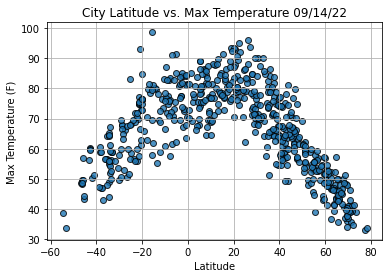

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

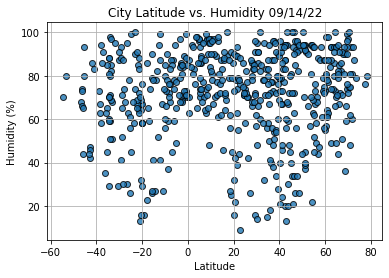

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

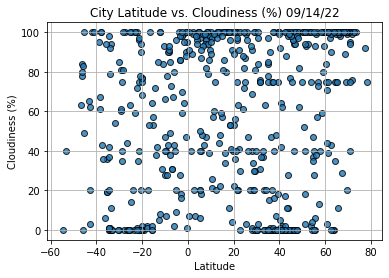

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

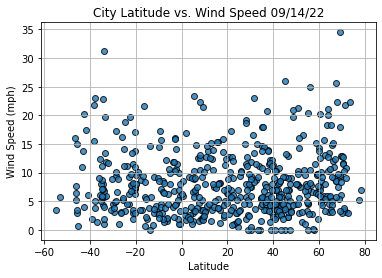

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Saint-Francois,FR,2022-09-14 05:08:15,46.4154,3.9054,62.04,100,0,2.30
4,Pevek,RU,2022-09-14 05:08:16,69.7008,170.3133,34.21,99,100,6.02
5,Ponta Do Sol,PT,2022-09-14 05:08:16,32.6667,-17.1000,70.72,78,37,8.72
11,Cockburn Town,TC,2022-09-14 05:08:18,21.4612,-71.1419,84.16,74,100,17.36
12,Hilo,US,2022-09-14 05:08:18,19.7297,-155.0900,77.29,86,40,6.91
...,...,...,...,...,...,...,...,...,...
555,Isiolo,KE,2022-09-14 05:22:52,0.3546,37.5822,70.12,63,91,6.26
556,Mayo,US,2022-09-14 05:21:53,38.8876,-76.5119,69.98,80,0,5.75
557,Ongole,IN,2022-09-14 05:22:53,15.5000,80.0500,91.33,46,81,15.39
558,Juneau,US,2022-09-14 05:22:53,58.3019,-134.4197,54.21,93,100,11.50


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Saint-Francois,FR,2022-09-14 05:08:15,46.4154,3.9054,62.04,100,0,2.30
4,Pevek,RU,2022-09-14 05:08:16,69.7008,170.3133,34.21,99,100,6.02
5,Ponta Do Sol,PT,2022-09-14 05:08:16,32.6667,-17.1000,70.72,78,37,8.72
11,Cockburn Town,TC,2022-09-14 05:08:18,21.4612,-71.1419,84.16,74,100,17.36
12,Hilo,US,2022-09-14 05:08:18,19.7297,-155.0900,77.29,86,40,6.91


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

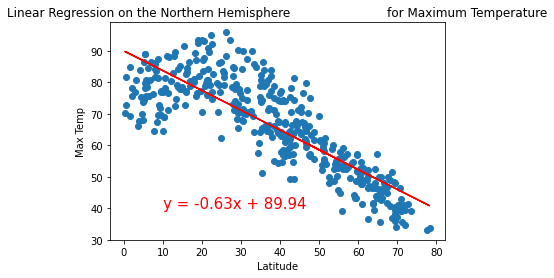

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

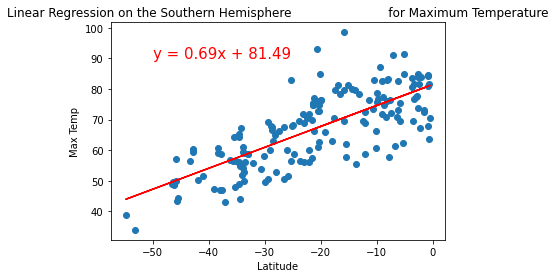

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

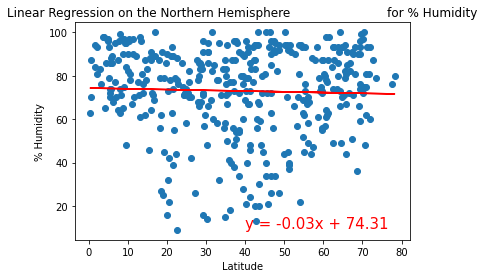

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

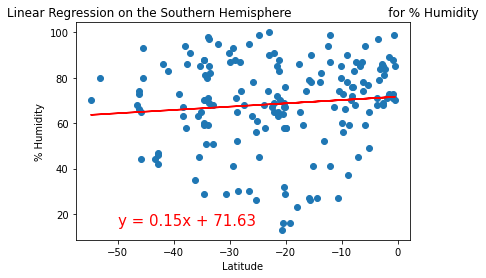

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

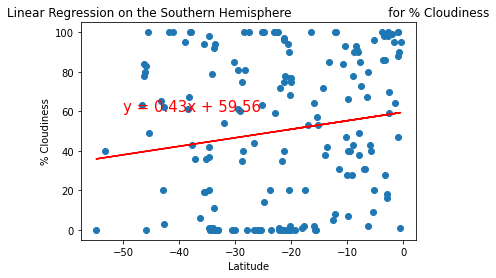

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

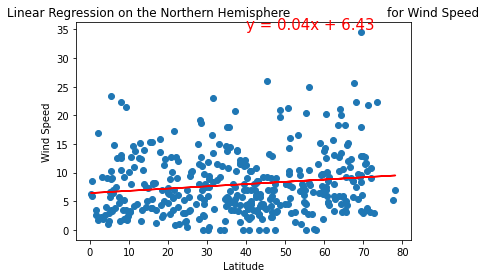

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

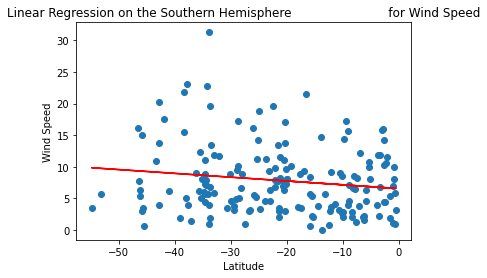

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
